In [1]:
import sys
import os

parent_dir = os.path.abspath('../')  
sys.path.append(parent_dir)

import re
from misc import *
from get_benchmark_results_utils import *

In [2]:
full_stats = load_data_structure("../logs/saved_ds/benchmark_stats.yaml")
all_circuit_stats = {}
for type_bm in full_stats:
    for k in full_stats[type_bm]:
        assert k not in all_circuit_stats
        all_circuit_stats[k] = full_stats[type_bm][k]
        all_circuit_stats[k]["type_bench"] = type_bm

In [3]:
depth_stats_d = dict()
# depth
for cur_max_depth in range(10):
    cur_max_depth = str(cur_max_depth)
    flag_str = '111'

    log_path = f"../logs/ours/our_logs_{flag_str}_{cur_max_depth}.log"
    log_path_with_contributions = f"../logs/ours/our_logs_with_contributions_{flag_str}_{cur_max_depth}.log"
    sr, t = get_overall_average_time_accuracy_from_logs(log_path,all_circuit_stats)
    depth_stats_d[cur_max_depth] = (sr, t)
                    

In [4]:
depth_stats_d

{'0': (0.5056818181818181, 8.644088352272727),
 '1': (0.5056818181818181, 8.650432556818181),
 '2': (0.7954545454545454, 6.097092255681818),
 '3': (0.7954545454545454, 6.150525914772726),
 '4': (0.8068181818181819, 6.318026028409091),
 '5': (0.7897727272727273, 6.546968295454547),
 '6': (0.7840909090909091, 6.887186823863638),
 '7': (0.7727272727272727, 7.263802198863635),
 '8': (0.7556818181818181, 7.777728511363635),
 '9': (0.7011494252873562, 9.922487982758621)}

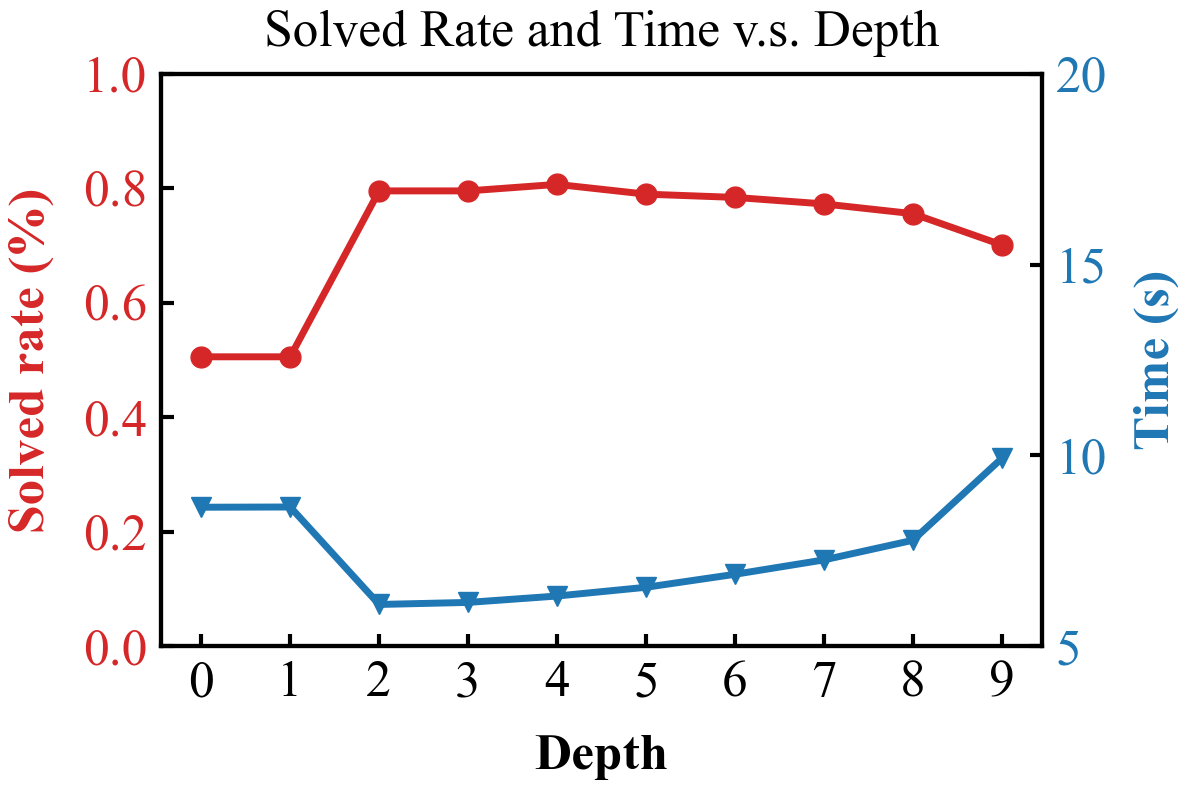

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family']='Times New Roman'

font1 = {
    'family' : 'Times New Roman',
#     'family' : 'Arial',
#     'family' : 'SimHei',
    'weight' : 'normal',
    'size'   : 36,
}

data = depth_stats_d

depths = [int(key) for key in data.keys()]
accuracies = [value[0] for value in data.values()]
times = [value[1] for value in data.values()]

plt.rcParams['figure.figsize'] = (12.0, 8.0)  
plt.rcParams['xtick.direction'] = 'in'  
plt.rcParams['ytick.direction'] = 'in'  

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Depth', fontsize=37, labelpad=20, fontweight='bold')
ax1.set_ylabel('Solved rate (%)', color=color, fontsize=37, labelpad=20, fontweight='bold')
ax1.plot(depths, accuracies, color=color, lw=5, marker='o', markersize=15, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color, width=3, pad=10)
ax1.tick_params(which='both', width=3, pad=10)
ax1.tick_params(which='major', length=9)
ax1.tick_params(which='minor', length=5)
ax1.set_ylim([0, 1])  
ax1.tick_params(axis='x', labelsize=37)  
ax1.tick_params(axis='y', labelsize=37)  
plt.xticks(range(0, 10), range(0, 10))  


for spine in ax1.spines.values():
    spine.set_linewidth(3)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time (s)', color=color, fontsize=37, labelpad=20, fontweight='bold')
ax2.plot(depths, times, color=color, lw=5, marker='v', markersize=15, label='Time')
ax2.tick_params(axis='y', labelcolor=color, width=3, pad=10)
ax2.tick_params(which='both', width=3, pad=10)
ax2.tick_params(which='major', length=9)
ax2.tick_params(which='minor', length=5)
ax2.set_ylim([5, 20]) 
ax2.tick_params(axis='y', labelsize=37)  

for spine in ax2.spines.values():
    spine.set_linewidth(3)

plt.title('Solved Rate and Time v.s. Depth', fontsize=37, pad=20)
fig.tight_layout()

plt.show()

fig.savefig("depth_comparison.pdf", bbox_inches='tight')

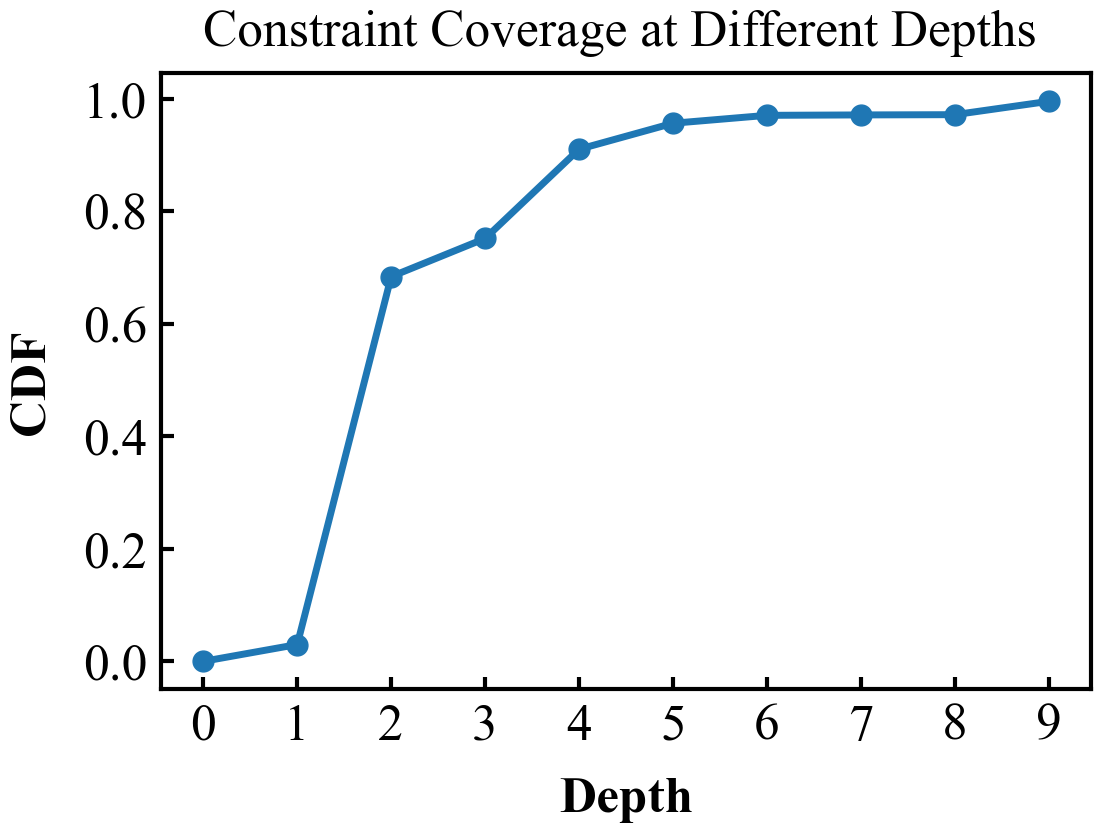

In [6]:
# taken from ./get_benchmark_results_poly_counts.ipynb
data_cdf = {'0': (0.5, 10, 0.0), '1': (0.6, 11, 2.989362528146595),
        '2': (0.7, 12, 68.41052029731274), '3': (0.75, 13, 75.19852614192237),
        '4': (0.8, 14, 91.06261779217753), '5': (0.85, 15, 95.68395344076686),
        '6': (0.9, 16, 97.08969499325893), '7': (0.92, 17, 97.16345848421321),
        '8': (0.93, 18, 97.20863421073065), '9': (0.95, 19, 99.5796539821697)}


x_data = list(data_cdf.keys())
y_data = [data_cdf[i][2] / 100 for i in x_data]

# f = plt.figure()
plt.rcParams['figure.figsize'] = (12.0, 8.0) 
plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in' 
f = plt.figure()
plt.xlabel("Depth",fontsize=37,labelpad=20, fontweight='bold') 
plt.ylabel("CDF",fontsize=37,labelpad=20, fontweight='bold') 

plt.plot(x_data,y_data,lw=5,marker='o',markersize=15,markevery=0.05)  
plt.xticks(fontsize=37) 
plt.yticks(fontsize=37) 
ax=plt.gca() 
ax.spines['bottom'].set_linewidth(3) 
ax.spines['left'].set_linewidth(3) 
ax.spines['right'].set_linewidth(3) 
ax.spines['top'].set_linewidth(3) 
ax.tick_params(which='both', width=3, pad=10)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5)

plt.title('Constraint Coverage at Different Depths ', fontsize=37, pad=20)


plt.show()
f.savefig("cdf_bpg.pdf", bbox_inches='tight')